# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
import json

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("/content/bank-raw.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Eksplorasi fitur Kategorikal


Sebaran 'deposit'

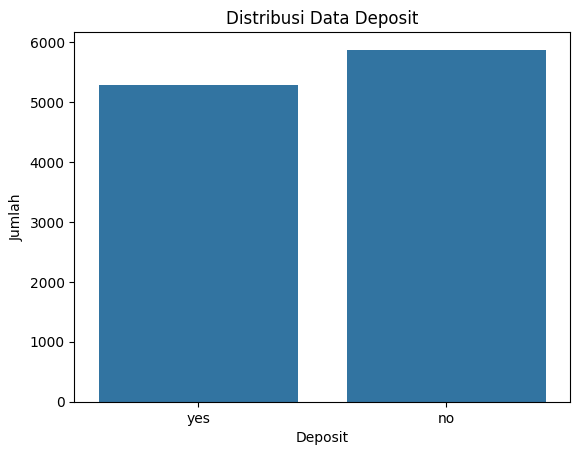

In [5]:
sns.countplot(x='deposit', data=df)
plt.title('Distribusi Data Deposit')
plt.xlabel('Deposit')
plt.ylabel('Jumlah')
plt.show()

Distribusi kolom kategorikal

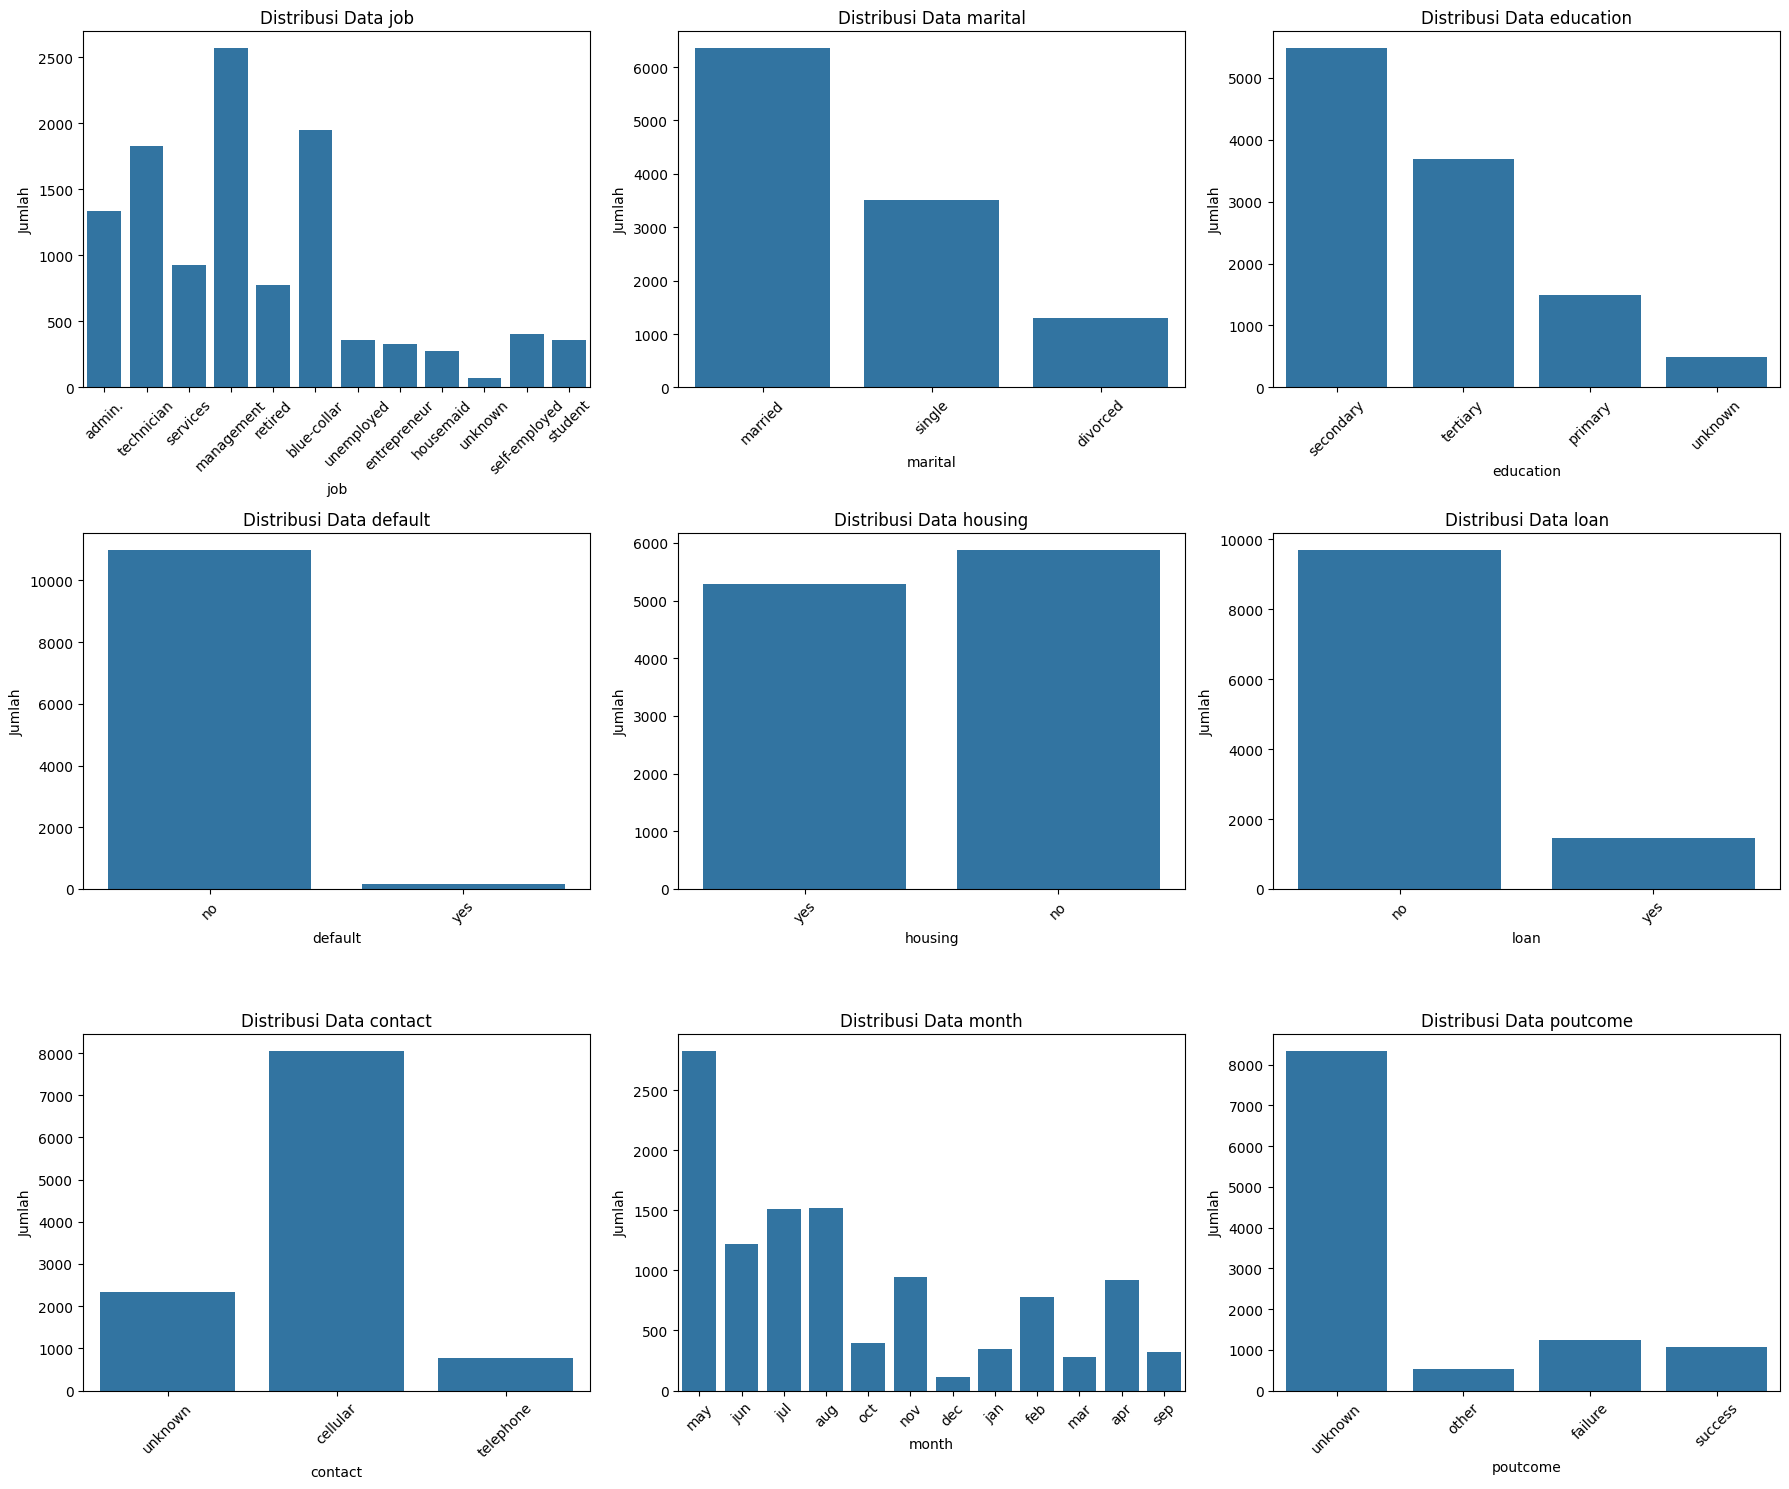

In [6]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
filtered_categorical_cols = [col for col in categorical_cols if col != 'deposit']

num_plots = len(filtered_categorical_cols)
n_cols_grid = 3
n_rows_grid = math.ceil(num_plots / n_cols_grid)
fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(n_cols_grid * 6, n_rows_grid * 5))
axes = axes.flatten()

for i, col in enumerate(filtered_categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribusi Data {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', labelrotation=45)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [7]:
def plot_category_vs_target(column_name):
    """
    Membuat plot perbandingan kategori vs deposit (Target)
    """
    plt.figure(figsize=(12, 6))
    cross_tab = pd.crosstab(df[column_name], df['deposit'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, color=['#d65f5f', '#5fba7d'], figsize=(10,6))

    plt.title(f'Hubungan {column_name.capitalize()} dengan Keputusan Deposit', fontsize=15)
    plt.xlabel(column_name.capitalize(), fontsize=12)
    plt.ylabel('Proporsi', fontsize=12)
    plt.legend(title='Deposit', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Distribusi kolom 'poutcome' serta hubungannya dengan 'deposit'

<Figure size 1200x600 with 0 Axes>

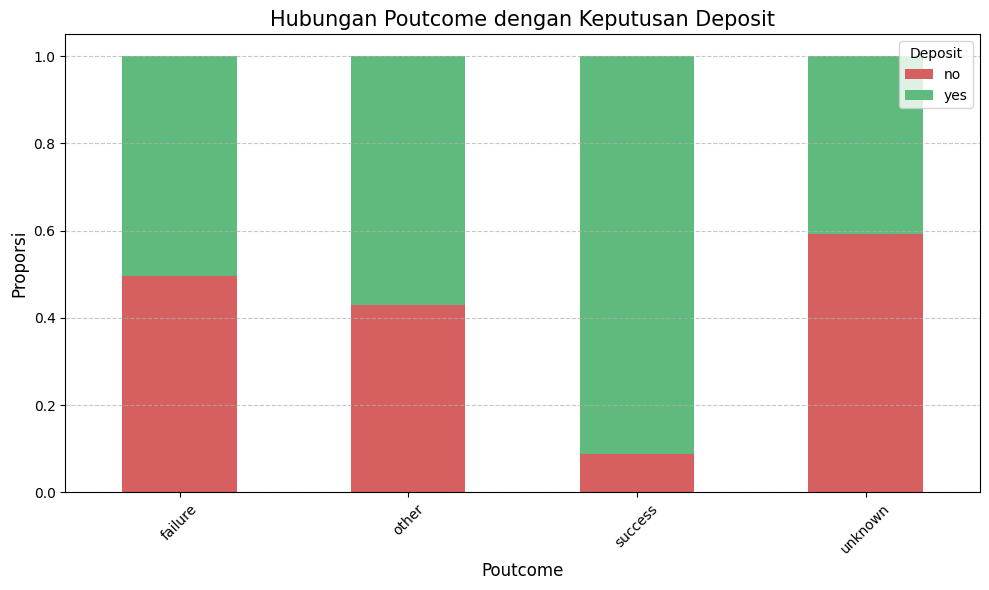

In [8]:
plot_category_vs_target('poutcome')

Distribusi kolom 'contact' serta hubungannya dengan 'deposit'

<Figure size 1200x600 with 0 Axes>

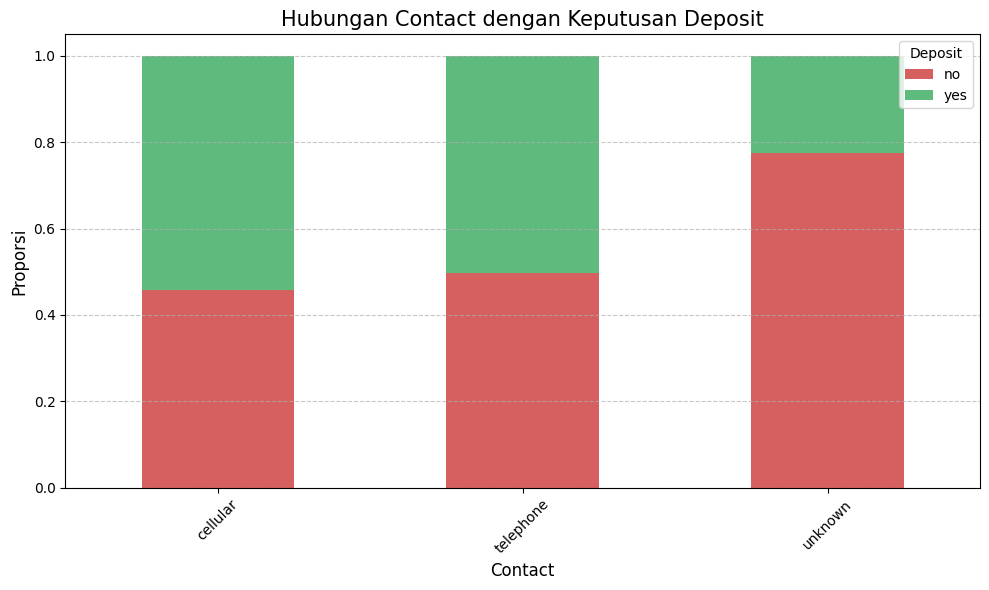

In [9]:
plot_category_vs_target('contact')

Distribusi kolom 'job' serta hubungannya dengan 'deposit'

<Figure size 1200x600 with 0 Axes>

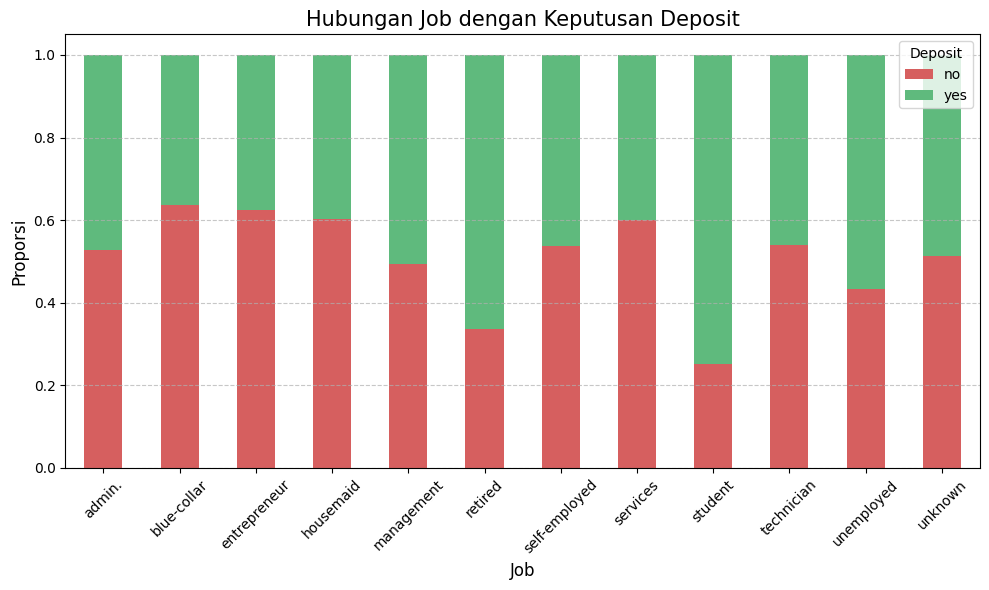

In [10]:
plot_category_vs_target('job')

Distribusi kolom 'month' serta hubungannya dengan 'deposit'

<Figure size 1200x600 with 0 Axes>

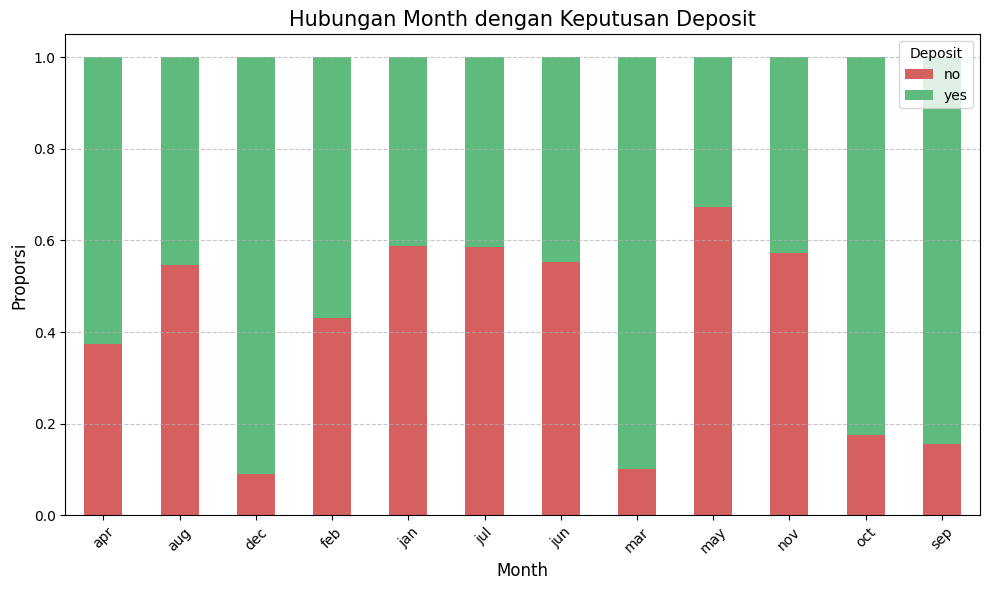

In [11]:
plot_category_vs_target('month')

Visualisasi mapping 'month' menjadi 'quarter' terhadap conversion rate 'deposit'

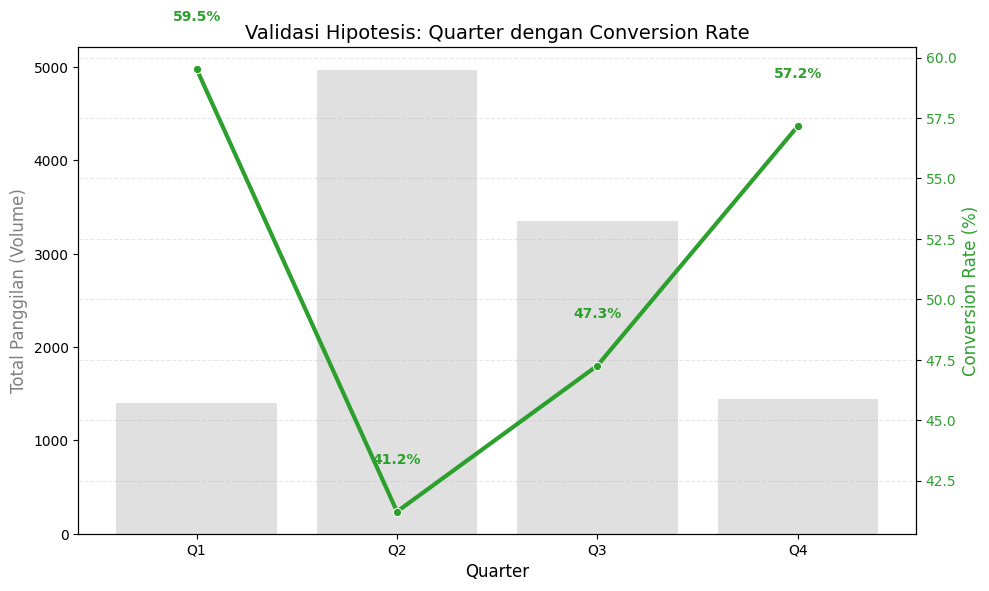

In [12]:
quarter_map = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

df['quarter'] = df['month'].map(quarter_map)

quarter_stats = df.groupby('quarter').agg(
    Volume=('deposit', 'count'),
    Success_Count=('deposit', lambda x: (x=='yes').sum())
).reindex(['Q1', 'Q2', 'Q3', 'Q4'])

quarter_stats['Conversion_Rate'] = (quarter_stats['Success_Count'] / quarter_stats['Volume']) * 100

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=quarter_stats.index, y=quarter_stats['Volume'], color='#d9d9d9', alpha=0.8, ax=ax1)
ax1.set_ylabel('Total Panggilan (Volume)', color='gray', fontsize=12)
ax1.set_xlabel('Quarter', fontsize=12)

ax2 = ax1.twinx()
sns.lineplot(x=quarter_stats.index, y=quarter_stats['Conversion_Rate'], color='#2ca02c', marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('Conversion Rate (%)', color='#2ca02c', fontsize=12)
ax2.tick_params(axis='y', labelcolor='#2ca02c')

for x, y in zip(range(4), quarter_stats['Conversion_Rate']):
    ax2.text(x, y + 2, f'{y:.1f}%', ha='center', color='#2ca02c', fontweight='bold')

plt.title('Validasi Hipotesis: Quarter dengan Conversion Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Eksplorasi fitur Numerikal

Correlation Matrix

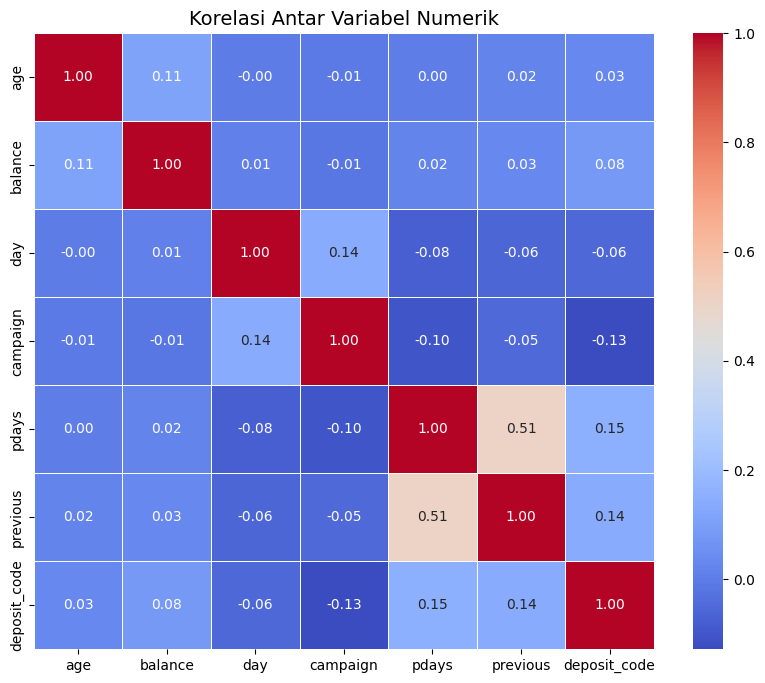

In [13]:
numerical_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

df['deposit_code'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
corr_matrix = df[numerical_cols + ['deposit_code']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik', fontsize=14)
plt.show()

Distribusi kolom 'age' berdasarkan 'deposit'

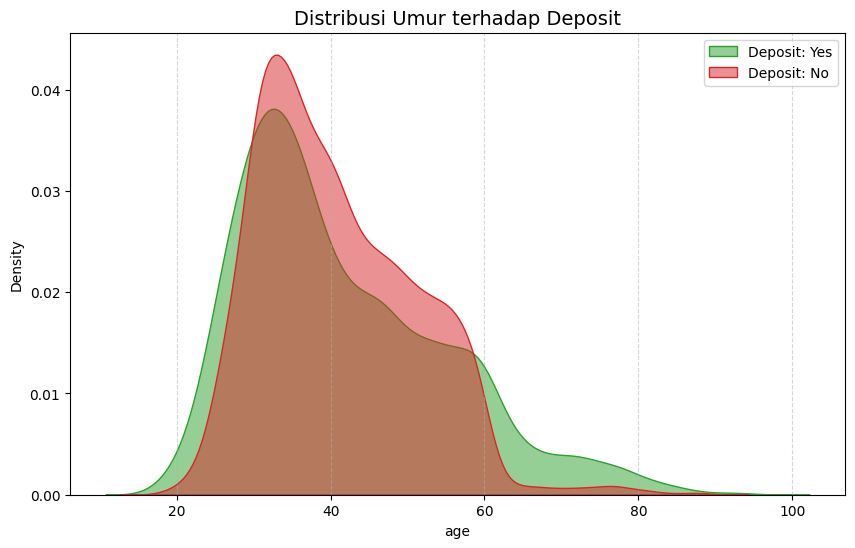

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['deposit'] == 'yes'], x='age', fill=True, color='#2ca02c', label='Deposit: Yes', alpha=0.5)
sns.kdeplot(data=df[df['deposit'] == 'no'], x='age', fill=True, color='#d62728', label='Deposit: No', alpha=0.5)
plt.title('Distribusi Umur terhadap Deposit', fontsize=14)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

Pengelompokan umur dan perbandingannya terhadap conversion rate 'deposit'

/tmp/ipython-input-1583548920.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg(


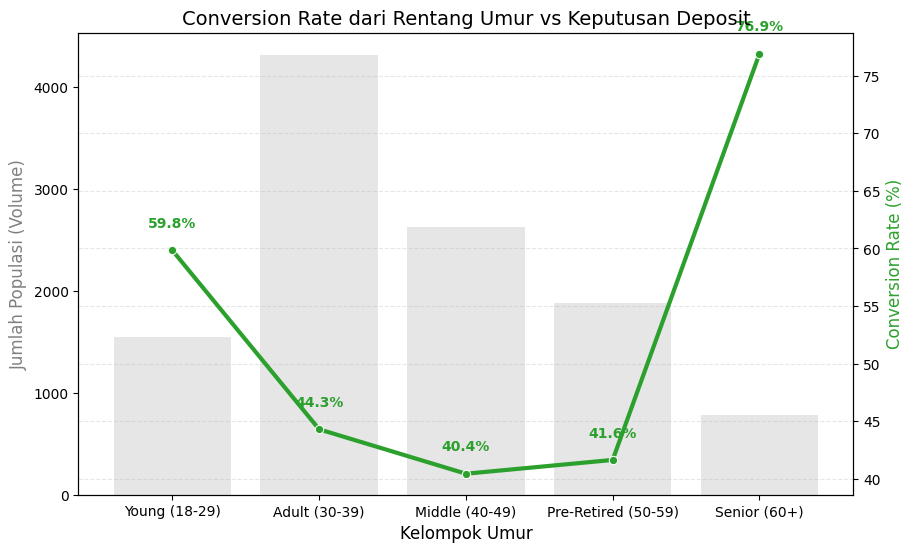

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bins = [18, 30, 40, 50, 60, 95]
labels = ['Young (18-29)', 'Adult (30-39)', 'Middle (40-49)', 'Pre-Retired (50-59)', 'Senior (60+)']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_stats = df.groupby('age_group').agg(
    Conversion_Rate=('deposit', lambda x: (x=='yes').mean() * 100),
    Volume=('deposit', 'count')
)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x=age_stats.index, y=age_stats['Volume'], color='#e0e0e0', alpha=0.8, ax=ax1)
ax1.set_ylabel('Jumlah Populasi (Volume)', color='gray', fontsize=12)
ax1.set_xlabel('Kelompok Umur', fontsize=12)

ax2 = ax1.twinx()
sns.lineplot(x=age_stats.index, y=age_stats['Conversion_Rate'], color='#2ca02c', marker='o', linewidth=3, ax=ax2, sort=False)
ax2.set_ylabel('Conversion Rate (%)', color='#2ca02c', fontsize=12)
for i, rate in enumerate(age_stats['Conversion_Rate']):
    ax2.text(i, rate + 2, f'{rate:.1f}%', ha='center', color='#2ca02c', fontweight='bold')

plt.title('Conversion Rate dari Rentang Umur vs Keputusan Deposit', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

Distribusi 'balance' terhadap 'deposit'

/tmp/ipython-input-3659213148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='deposit', y='balance', data=df, palette=['#d62728', '#2ca02c'])


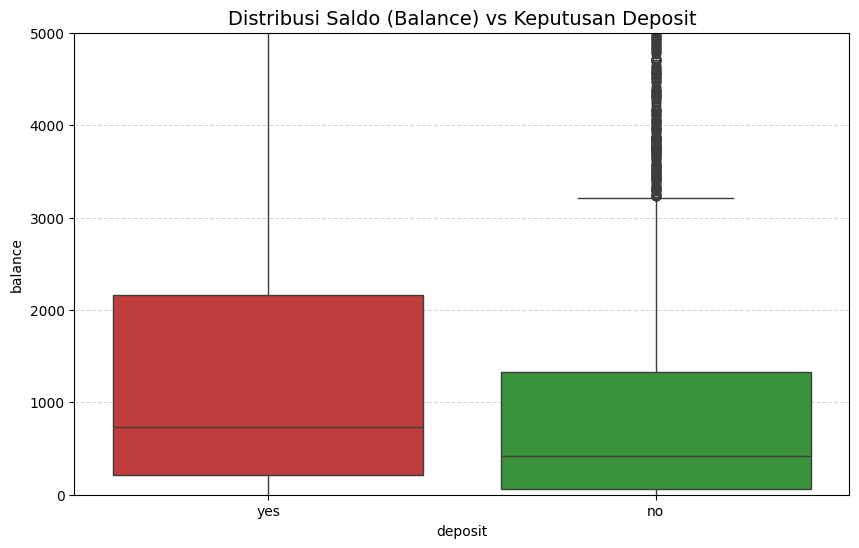

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='deposit', y='balance', data=df, palette=['#d62728', '#2ca02c'])
plt.title('Distribusi Saldo (Balance) vs Keputusan Deposit', fontsize=14)
plt.ylim(0, 5000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Distribusi 'campaign' terhadap 'deposit'

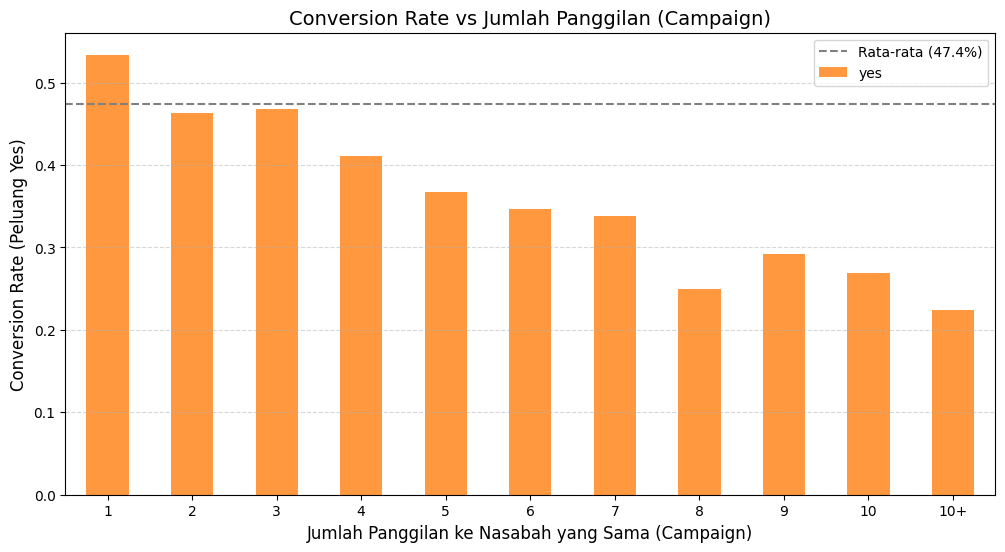

In [17]:
df['campaign_group'] = df['campaign'].apply(lambda x: x if x <= 10 else 11)
campaign_stats = df.groupby('campaign_group')['deposit'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
campaign_stats['yes'].plot(kind='bar', color='#ff7f0e', alpha=0.8)
plt.title('Conversion Rate vs Jumlah Panggilan (Campaign)', fontsize=14)
plt.xlabel('Jumlah Panggilan ke Nasabah yang Sama (Campaign)', fontsize=12)
plt.ylabel('Conversion Rate (Peluang Yes)', fontsize=12)
plt.xticks(ticks=range(11), labels=[str(i) for i in range(1, 11)] + ['10+'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

avg_rate = df['deposit_code'].mean()
plt.axhline(avg_rate, color='grey', linestyle='--', label=f'Rata-rata ({avg_rate:.1%})')
plt.legend()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Binning age -> age_group

In [18]:
bins = [18, 30, 40, 50, 60, 95]
labels = ['Young', 'Adult', 'Middle', 'Pre-Retired', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df[['age', 'age_group']].head())

   age    age_group
0   59  Pre-Retired
1   56  Pre-Retired
2   41       Middle
3   55  Pre-Retired
4   54  Pre-Retired


Binning month -> quarter

In [19]:
quarter_map = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

df['quarter'] = df['month'].map(quarter_map)

print("Kolom 'quarter' telah berhasil dibuat.")
print(df[['month', 'quarter']].head())

Kolom 'quarter' telah berhasil dibuat.
  month quarter
0   may      Q2
1   may      Q2
2   may      Q2
3   may      Q2
4   may      Q2


Ekstraksi fitur is_prev_contacted & prev_contact_result

In [20]:
df['is_prev_contacted'] = np.where(df['pdays'] != -1, 'yes', 'no')
df['prev_contact_result'] = df['poutcome'].replace({
    'unknown': 0,
    'failure': 1,
    'other': 1,
    'success': 2
})
df.head()

/tmp/ipython-input-2751428135.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['prev_contact_result'] = df['poutcome'].replace({


,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,quarter,deposit_code,age_group,campaign_group,is_prev_contacted,prev_contact_result
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,-1,0,unknown,yes,Q2,1,Pre-Retired,1,no,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,-1,0,unknown,yes,Q2,1,Pre-Retired,1,no,0
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,-1,0,unknown,yes,Q2,1,Middle,1,no,0
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,-1,0,unknown,yes,Q2,1,Pre-Retired,1,no,0
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,-1,0,unknown,yes,Q2,1,Pre-Retired,2,no,0


Ekstraksi fitur housing && loan -> debt_status

In [21]:
df['housing_numeric'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan_numeric'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

df['debt_status'] = df['housing_numeric'] + df['loan_numeric']

df = df.drop(columns=['housing_numeric', 'loan_numeric'])

print("Kolom 'debt_status' telah berhasil dibuat.")
print(df[['housing', 'loan', 'debt_status']].head())

Kolom 'debt_status' telah berhasil dibuat.
  housing loan  debt_status
0     yes   no            1
1      no   no            0
2     yes   no            1
3     yes   no            1
4      no   no            0


Hapus kolom 'durastion' dan kolom yang dilakukan feature engineering

In [22]:
df = df.drop(columns=['duration', 'pdays', 'age','month','housing','loan', 'deposit_code','campaign_group','poutcome'])
print("Kolom 'duration' dan hasil ekstraksi telah dihapus.")
df.info()

Kolom 'duration' dan hasil ekstraksi telah dihapus.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   job                  11162 non-null  object  
 1   marital              11162 non-null  object  
 2   education            11162 non-null  object  
 3   default              11162 non-null  object  
 4   balance              11162 non-null  int64   
 5   contact              11162 non-null  object  
 6   day                  11162 non-null  int64   
 7   campaign             11162 non-null  int64   
 8   previous             11162 non-null  int64   
 9   deposit              11162 non-null  object  
 10  quarter              11162 non-null  object  
 11  age_group            11161 non-null  category
 12  is_prev_contacted    11162 non-null  object  
 13  prev_contact_result  11162 non-null  int64   
 14  debt_status       

Menangani 'Unknown' as Null Value

In [23]:
categorical_cols = df.select_dtypes(include='object').columns

print("Count of 'unknown' values in categorical columns:")
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"- {col}: {unknown_count}")
    else:
        print(f"- {col}: No 'unknown' values found.")

Count of 'unknown' values in categorical columns:
- job: 70
- marital: No 'unknown' values found.
- education: 497
- default: No 'unknown' values found.
- contact: 2346
- deposit: No 'unknown' values found.
- quarter: No 'unknown' values found.
- is_prev_contacted: No 'unknown' values found.


In [24]:
for col in ['job', 'education']:
    if 'unknown' in df[col].unique():
        mode_value = df[col][df[col] != 'unknown'].mode()[0]
        df[col] = df[col].replace('unknown', mode_value)

print("Count of 'unknown' values in categorical columns after imputation:")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"- {col}: {unknown_count}")
    else:
        print(f"- {col}: No 'unknown' values found.")

Count of 'unknown' values in categorical columns after imputation:
- job: No 'unknown' values found.
- marital: No 'unknown' values found.
- education: No 'unknown' values found.
- default: No 'unknown' values found.
- contact: 2346
- deposit: No 'unknown' values found.
- quarter: No 'unknown' values found.
- is_prev_contacted: No 'unknown' values found.


Menangani Data Duplikat

In [25]:
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 8


In [26]:
df.drop_duplicates(inplace=True)
print(f"Jumlah data duplikat setelah penghapusan: {df.duplicated().sum()}")

Jumlah data duplikat setelah penghapusan: 0


Scaling Data 'balance', 'campaign', 'previous'

In [27]:
scaler = StandardScaler()
columns_to_scale = ['balance', 'campaign', 'previous']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())

    balance  campaign  previous
0  0.252115 -0.554026 -0.363407
1 -0.460186 -0.554026 -0.363407
2 -0.080478 -0.554026 -0.363407
3  0.293341 -0.554026 -0.363407
4 -0.417100 -0.186739 -0.363407


Menangani Outlier pada 'balance' dengan IQR

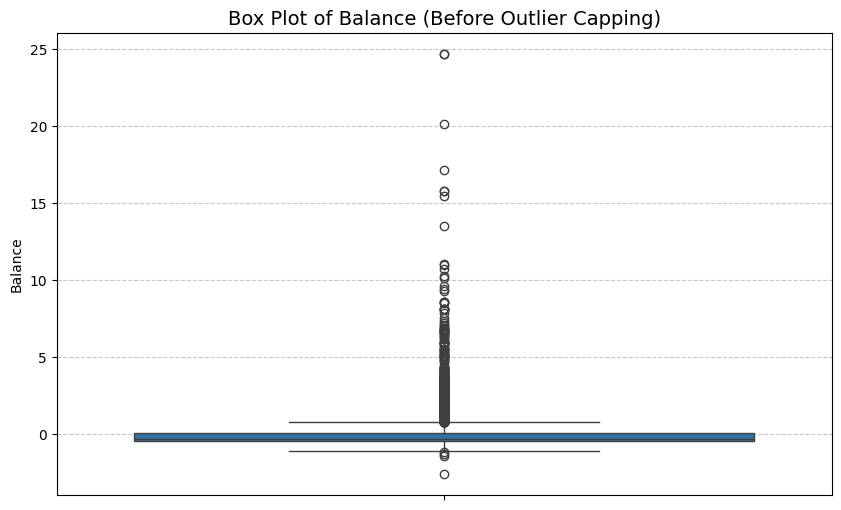

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['balance'])
plt.title('Box Plot of Balance (Before Outlier Capping)', fontsize=14)
plt.ylabel('Balance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['balance'] = np.where(df['balance'] < lower_bound, lower_bound, df['balance'])
df['balance'] = np.where(df['balance'] > upper_bound, upper_bound, df['balance'])

Menangani outlier pada 'campaign' dan 'previous' dengan cap 99th percentile

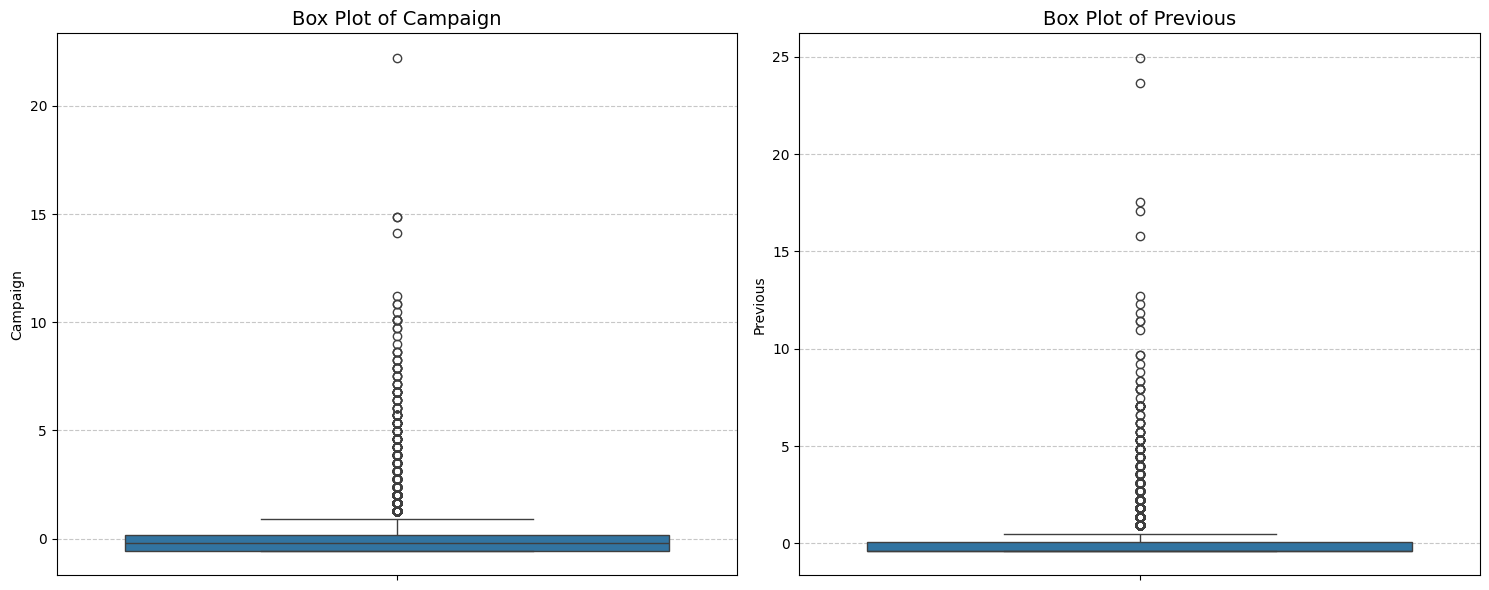

In [29]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['campaign'])
plt.title('Box Plot of Campaign', fontsize=14)
plt.ylabel('Campaign')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(y=df['previous'])
plt.title('Box Plot of Previous', fontsize=14)
plt.ylabel('Previous')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [30]:
campaign_99th_percentile = df['campaign'].quantile(0.99)
previous_99th_percentile = df['previous'].quantile(0.99)

df['campaign'] = np.where(df['campaign'] > campaign_99th_percentile, campaign_99th_percentile, df['campaign'])
df['previous'] = np.where(df['previous'] > previous_99th_percentile, previous_99th_percentile, df['previous'])

print(f"Batas 'campaign' pada persentil ke-99: {campaign_99th_percentile:.2f}.")
print(f"Batas 'previous' pada persentil ke-99: {previous_99th_percentile:.2f}.")

Batas 'campaign' pada persentil ke-99: 3.85.
Batas 'previous' pada persentil ke-99: 4.00.


One-hot encoding

In [31]:
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

categorical_cols_to_encode = ['job', 'marital', 'education', 'default', 'contact', 'quarter', 'is_prev_contacted', 'age_group']
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

print(df.head())

    balance  day  campaign  previous  deposit  prev_contact_result  \
0  0.252115    5 -0.554026 -0.363407        1                    0   
1 -0.460186    5 -0.554026 -0.363407        1                    0   
2 -0.080478    5 -0.554026 -0.363407        1                    0   
3  0.293341    5 -0.554026 -0.363407        1                    0   
4 -0.417100    5 -0.186739 -0.363407        1                    0   

   debt_status  job_blue-collar  job_entrepreneur  job_housemaid  ...  \
0            1            False             False          False  ...   
1            0            False             False          False  ...   
2            1            False             False          False  ...   
3            1            False             False          False  ...   
4            0            False             False          False  ...   

   contact_telephone  contact_unknown  quarter_Q2  quarter_Q3  quarter_Q4  \
0              False             True        True       False  

Mempersiapkan metadata untuk standar preprocessing

In [35]:
quarter_map = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}

poutcome_map = {
    'unknown': 0,
    'failure': 1,
    'other': 1,
    'success': 2
}

age_bins = [18, 30, 40, 50, 60, 95]
age_labels = ['Young', 'Adult', 'Middle', 'Pre-Retired', 'Senior']

scaler_info = {
    "mean": scaler.mean_.tolist(),
    "scale": scaler.scale_.tolist()
}

capping_info = {
    "campaign": campaign_99th_percentile,
    "previous": previous_99th_percentile
}

final_columns = [col for col in df.columns.tolist() if col != 'deposit']

metadata = {
    "mappings": {
        "quarter": quarter_map,
        "poutcome": poutcome_map
    },
    "binning": {
        "age_bins": age_bins,
        "age_labels": age_labels
    },
    "scaler": scaler_info,
    "capping": capping_info,
    "model_input_columns": final_columns,
    "features_to_drop": ["duration", "pdays", "age", "month", "housing", "loan", "poutcome"]
}

with open('bank_model_metadata.json', 'w') as f:
    json.dump(metadata, f)